In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
data=pd.read_csv(r"E:\data trained projects\Evaluation Projects\assignment 3\flight price prediction.csv")

In [24]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [25]:
data.shape

(10683, 11)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [27]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [28]:
data.dropna(inplace=True)

In [29]:
data['Journey_day']=pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [30]:
data['Journey_month']=pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [31]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [32]:
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [33]:
data['Dep_Hour']=pd.to_datetime(data['Dep_Time']).dt.hour

In [34]:
data['Dep_Min']=pd.to_datetime(data['Dep_Time']).dt.minute

In [35]:
data.drop(['Dep_Time'],axis=1,inplace=True)

In [36]:
data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour

In [37]:
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute

In [38]:
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [44]:
duration_hours=[]
duration_mins=[]
duration=list(data['Duration'])
for i in range(len(duration)):
    #print( duration[i].split()[1])
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration_hours.append(duration[i].split()[0])
            duration_mins.append("0m")
        else:
            duration_mins.append(duration[i].split()[0])
            duration_hours.append("0h")
    else:
        duration_hours.append(duration[i].split()[0])
        duration_mins.append(duration[i].split()[1]) 
                
duration_hours
#duration_mins
data['Duration_hours']=duration_hours
data['Duration_mins']=duration_mins

In [45]:
#df['Duration_hours']
dur_hrs=[]
#df['Duration_hours']=df.Duration_hours[0:len(df['Duration_hours'])-1].astype(np.float)
for hrs in data['Duration_hours']:
     dur_hrs.append(float(hrs[0:len(hrs.strip())-1]))
dur_hrs

[2.0,
 7.0,
 19.0,
 5.0,
 4.0,
 2.0,
 15.0,
 21.0,
 25.0,
 7.0,
 13.0,
 2.0,
 2.0,
 12.0,
 2.0,
 26.0,
 4.0,
 22.0,
 23.0,
 20.0,
 5.0,
 15.0,
 2.0,
 2.0,
 13.0,
 15.0,
 5.0,
 5.0,
 2.0,
 2.0,
 2.0,
 13.0,
 2.0,
 22.0,
 5.0,
 10.0,
 5.0,
 2.0,
 6.0,
 11.0,
 11.0,
 8.0,
 22.0,
 2.0,
 12.0,
 2.0,
 2.0,
 2.0,
 16.0,
 19.0,
 3.0,
 25.0,
 2.0,
 3.0,
 2.0,
 16.0,
 15.0,
 2.0,
 6.0,
 25.0,
 12.0,
 27.0,
 10.0,
 10.0,
 2.0,
 10.0,
 2.0,
 1.0,
 13.0,
 2.0,
 1.0,
 26.0,
 7.0,
 13.0,
 5.0,
 2.0,
 2.0,
 1.0,
 19.0,
 2.0,
 14.0,
 2.0,
 22.0,
 9.0,
 10.0,
 21.0,
 5.0,
 18.0,
 12.0,
 18.0,
 9.0,
 11.0,
 17.0,
 13.0,
 2.0,
 2.0,
 2.0,
 3.0,
 1.0,
 16.0,
 12.0,
 12.0,
 7.0,
 24.0,
 2.0,
 8.0,
 7.0,
 14.0,
 30.0,
 19.0,
 15.0,
 2.0,
 12.0,
 10.0,
 5.0,
 15.0,
 16.0,
 10.0,
 2.0,
 11.0,
 2.0,
 1.0,
 14.0,
 20.0,
 2.0,
 23.0,
 18.0,
 16.0,
 2.0,
 2.0,
 8.0,
 16.0,
 3.0,
 2.0,
 14.0,
 23.0,
 21.0,
 21.0,
 2.0,
 10.0,
 8.0,
 8.0,
 5.0,
 8.0,
 11.0,
 27.0,
 8.0,
 20.0,
 4.0,
 8.0,
 2.0,
 24.0,
 2.0,
 12.0,
 

In [46]:
#df['Duration_hours']
dur_min=[]
#df['Duration_hours']=df.Duration_hours[0:len(df['Duration_hours'])-1].astype(np.float)
for min in data['Duration_mins']:
     dur_min.append(float(min[0:len(min.strip())-1]))
dur_min

[50.0,
 25.0,
 0.0,
 25.0,
 45.0,
 25.0,
 30.0,
 5.0,
 30.0,
 50.0,
 15.0,
 35.0,
 15.0,
 10.0,
 35.0,
 35.0,
 30.0,
 35.0,
 0.0,
 35.0,
 10.0,
 20.0,
 50.0,
 55.0,
 20.0,
 10.0,
 45.0,
 55.0,
 50.0,
 15.0,
 15.0,
 25.0,
 50.0,
 0.0,
 30.0,
 25.0,
 15.0,
 30.0,
 15.0,
 55.0,
 5.0,
 30.0,
 5.0,
 45.0,
 0.0,
 50.0,
 50.0,
 15.0,
 5.0,
 55.0,
 15.0,
 20.0,
 50.0,
 0.0,
 50.0,
 15.0,
 5.0,
 15.0,
 30.0,
 5.0,
 25.0,
 20.0,
 15.0,
 30.0,
 15.0,
 25.0,
 50.0,
 30.0,
 20.0,
 15.0,
 25.0,
 30.0,
 20.0,
 30.0,
 0.0,
 45.0,
 50.0,
 30.0,
 5.0,
 15.0,
 50.0,
 40.0,
 10.0,
 35.0,
 0.0,
 20.0,
 25.0,
 45.0,
 20.0,
 0.0,
 15.0,
 5.0,
 30.0,
 20.0,
 35.0,
 25.0,
 40.0,
 0.0,
 25.0,
 35.0,
 20.0,
 15.0,
 30.0,
 0.0,
 45.0,
 55.0,
 10.0,
 30.0,
 20.0,
 55.0,
 0.0,
 55.0,
 45.0,
 10.0,
 55.0,
 25.0,
 5.0,
 10.0,
 40.0,
 55.0,
 40.0,
 25.0,
 5.0,
 15.0,
 25.0,
 10.0,
 10.0,
 0.0,
 50.0,
 20.0,
 0.0,
 55.0,
 10.0,
 45.0,
 0.0,
 50.0,
 40.0,
 15.0,
 45.0,
 50.0,
 0.0,
 15.0,
 25.0,
 35.0,
 50.0,
 35.0,
 25

In [47]:
data['Duration_hours']=dur_hrs
data['Duration_mins']=dur_min

In [48]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7.0,25.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5.0,25.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25,2.0,30.0
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20,2.0,35.0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20,3.0,0.0
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10,2.0,40.0


In [50]:
#data['Duration_hours']=duration_hours
#data['Duration_mins']=duration_mins

In [51]:
data.drop(["Duration"],axis=1,inplace=True)

In [52]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7.0,25.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5.0,25.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2.0,30.0
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2.0,35.0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3.0,0.0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2.0,40.0


In [53]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [54]:
Airline=data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [55]:
Source=data[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [56]:
Destination=data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [57]:
data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [58]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [59]:
data['Total_Stops']=data['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [60]:
df=pd.concat([data,Airline,Source,Destination],axis=1)

In [61]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,...,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,...,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,...,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,...,0,0,0,0,0,0,0,0,0,1


In [62]:
df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [63]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2.0,50.0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7.0,25.0,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19.0,0.0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5.0,25.0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4.0,45.0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
df.shape

(10682, 30)

In [65]:
#test data

In [66]:
data_test=pd.read_csv(r"E:\data trained projects\Evaluation Projects\assignment 3\flight price predictionTest_set.csv")

In [67]:
data_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [68]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [69]:
data_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [70]:
data_test['Journey_day']=pd.to_datetime(data_test.Date_of_Journey, format="%d/%m/%Y").dt.day

In [71]:
data_test['Journey_month']=pd.to_datetime(data_test.Date_of_Journey, format="%d/%m/%Y").dt.month

In [72]:
data_test.drop(['Date_of_Journey'],axis=1,inplace=True)

In [73]:
data_test['Dep_Hour']=pd.to_datetime(data_test['Dep_Time']).dt.hour

In [74]:
data_test['Dep_Min']=pd.to_datetime(data_test['Dep_Time']).dt.minute

In [75]:
data_test.drop(['Dep_Time'],axis=1,inplace=True)

In [76]:
data_test['Arrival_hour']=pd.to_datetime(data_test['Arrival_Time']).dt.hour

In [77]:
data_test['Arrival_min']=pd.to_datetime(data_test['Arrival_Time']).dt.minute

In [78]:
data_test.drop(['Arrival_Time'],axis=1,inplace=True)

In [79]:
duration_hours=[]
duration_mins=[]
duration=list(data_test['Duration'])
for i in range(len(duration)):
    #print( duration[i].split()[1])
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration_hours.append(duration[i].split()[0])
            duration_mins.append("0m")
        else:
            duration_mins.append(duration[i].split()[0])
            duration_hours.append("0h")
    else:
        duration_hours.append(duration[i].split()[0])
        duration_mins.append(duration[i].split()[1]) 
                
duration_hours
#duration_mins
data_test['Duration_hours']=duration_hours
data_test['Duration_mins']=duration_mins

In [80]:
#df['Duration_hours']
dur_hrs=[]
#df['Duration_hours']=df.Duration_hours[0:len(df['Duration_hours'])-1].astype(np.float)
for hrs in data_test['Duration_hours']:
     dur_hrs.append(float(hrs[0:len(hrs.strip())-1]))
dur_hrs

[10.0,
 4.0,
 23.0,
 13.0,
 2.0,
 18.0,
 15.0,
 5.0,
 2.0,
 6.0,
 28.0,
 9.0,
 10.0,
 4.0,
 17.0,
 10.0,
 9.0,
 12.0,
 9.0,
 9.0,
 14.0,
 14.0,
 11.0,
 13.0,
 2.0,
 12.0,
 2.0,
 25.0,
 19.0,
 7.0,
 2.0,
 11.0,
 7.0,
 3.0,
 1.0,
 2.0,
 1.0,
 6.0,
 17.0,
 10.0,
 2.0,
 12.0,
 1.0,
 23.0,
 5.0,
 2.0,
 23.0,
 1.0,
 27.0,
 13.0,
 28.0,
 5.0,
 26.0,
 5.0,
 2.0,
 2.0,
 5.0,
 7.0,
 5.0,
 25.0,
 13.0,
 26.0,
 5.0,
 5.0,
 2.0,
 2.0,
 5.0,
 8.0,
 3.0,
 7.0,
 1.0,
 21.0,
 16.0,
 7.0,
 1.0,
 3.0,
 2.0,
 19.0,
 2.0,
 14.0,
 2.0,
 16.0,
 5.0,
 2.0,
 10.0,
 13.0,
 2.0,
 11.0,
 2.0,
 13.0,
 18.0,
 28.0,
 5.0,
 23.0,
 1.0,
 1.0,
 13.0,
 6.0,
 1.0,
 10.0,
 4.0,
 11.0,
 7.0,
 12.0,
 2.0,
 15.0,
 1.0,
 19.0,
 13.0,
 12.0,
 9.0,
 14.0,
 2.0,
 4.0,
 7.0,
 23.0,
 10.0,
 5.0,
 22.0,
 8.0,
 27.0,
 11.0,
 2.0,
 2.0,
 5.0,
 15.0,
 2.0,
 2.0,
 9.0,
 2.0,
 8.0,
 5.0,
 5.0,
 2.0,
 2.0,
 7.0,
 19.0,
 2.0,
 2.0,
 12.0,
 2.0,
 25.0,
 10.0,
 8.0,
 3.0,
 12.0,
 3.0,
 2.0,
 12.0,
 22.0,
 7.0,
 7.0,
 7.0,
 2.0,
 2.0,
 2.0,


In [117]:
#df['Duration_hours']
dur_min=[]
#df['Duration_hours']=df.Duration_hours[0:len(df['Duration_hours'])-1].astype(np.float)
for min in data['Duration_mins']:
     dur_min.append(float(min[0:len(min.strip())-1]))
dur_min

AttributeError: 'float' object has no attribute 'strip'

In [82]:
data_test

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,10h,55m
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20,4h,0m
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0,23h,45m
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0,13h,0m
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45,2h,50m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,6,6,20,30,20,25,23h,55m
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,27,3,14,20,16,55,2h,35m
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,6,3,21,50,4,25,6h,35m
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,6,3,4,0,19,15,15h,15m


In [83]:
data_test['Duration_hours']=duration_hours
data_test['Duration_mins']=duration_mins

In [84]:
data_test.drop(["Duration"],axis=1,inplace=True)

In [85]:
data_test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10h,55m
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4h,0m
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23h,45m
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13h,0m
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2h,50m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,6,6,20,30,20,25,23h,55m
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,27,3,14,20,16,55,2h,35m
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,21,50,4,25,6h,35m
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,4,0,19,15,15h,15m


In [86]:
Airline=data_test[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [87]:
Source=data_test[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [88]:
Destination=data_test[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [89]:
data_test.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [90]:
data_test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [91]:
data_test['Total_Stops']=data_test['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [92]:
df_test=pd.concat([data_test,Airline,Source,Destination],axis=1)

In [93]:
df_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [94]:
df_test

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10h,55m,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4h,0m,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23h,45m,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13h,0m,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2h,50m,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23h,55m,1,...,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,14,20,16,55,2h,35m,0,...,0,0,0,1,0,0,0,0,0,0
2668,1,6,3,21,50,4,25,6h,35m,0,...,0,0,1,0,0,1,0,0,0,0
2669,1,6,3,4,0,19,15,15h,15m,1,...,0,0,1,0,0,1,0,0,0,0


In [95]:
df_test.shape

(2671, 28)

In [100]:
#df['Duration_hours']
dur_hrs=[]
#df['Duration_hours']=df.Duration_hours[0:len(df['Duration_hours'])-1].astype(np.float)
for hrs in data_test['Duration_hours']:
     dur_hrs.append(float(hrs[0:len(hrs.strip())-1]))
dur_hrs        

[10.0,
 4.0,
 23.0,
 13.0,
 2.0,
 18.0,
 15.0,
 5.0,
 2.0,
 6.0,
 28.0,
 9.0,
 10.0,
 4.0,
 17.0,
 10.0,
 9.0,
 12.0,
 9.0,
 9.0,
 14.0,
 14.0,
 11.0,
 13.0,
 2.0,
 12.0,
 2.0,
 25.0,
 19.0,
 7.0,
 2.0,
 11.0,
 7.0,
 3.0,
 1.0,
 2.0,
 1.0,
 6.0,
 17.0,
 10.0,
 2.0,
 12.0,
 1.0,
 23.0,
 5.0,
 2.0,
 23.0,
 1.0,
 27.0,
 13.0,
 28.0,
 5.0,
 26.0,
 5.0,
 2.0,
 2.0,
 5.0,
 7.0,
 5.0,
 25.0,
 13.0,
 26.0,
 5.0,
 5.0,
 2.0,
 2.0,
 5.0,
 8.0,
 3.0,
 7.0,
 1.0,
 21.0,
 16.0,
 7.0,
 1.0,
 3.0,
 2.0,
 19.0,
 2.0,
 14.0,
 2.0,
 16.0,
 5.0,
 2.0,
 10.0,
 13.0,
 2.0,
 11.0,
 2.0,
 13.0,
 18.0,
 28.0,
 5.0,
 23.0,
 1.0,
 1.0,
 13.0,
 6.0,
 1.0,
 10.0,
 4.0,
 11.0,
 7.0,
 12.0,
 2.0,
 15.0,
 1.0,
 19.0,
 13.0,
 12.0,
 9.0,
 14.0,
 2.0,
 4.0,
 7.0,
 23.0,
 10.0,
 5.0,
 22.0,
 8.0,
 27.0,
 11.0,
 2.0,
 2.0,
 5.0,
 15.0,
 2.0,
 2.0,
 9.0,
 2.0,
 8.0,
 5.0,
 5.0,
 2.0,
 2.0,
 7.0,
 19.0,
 2.0,
 2.0,
 12.0,
 2.0,
 25.0,
 10.0,
 8.0,
 3.0,
 12.0,
 3.0,
 2.0,
 12.0,
 22.0,
 7.0,
 7.0,
 7.0,
 2.0,
 2.0,
 2.0,


In [102]:
#df['Duration_hours']
dur_min=[]
#df['Duration_hours']=df.Duration_hours[0:len(df['Duration_hours'])-1].astype(np.float)
for min in data_test['Duration_hours']:
     dur_min.append(float(min[0:len(min.strip())-1]))
dur_min

[10.0,
 4.0,
 23.0,
 13.0,
 2.0,
 18.0,
 15.0,
 5.0,
 2.0,
 6.0,
 28.0,
 9.0,
 10.0,
 4.0,
 17.0,
 10.0,
 9.0,
 12.0,
 9.0,
 9.0,
 14.0,
 14.0,
 11.0,
 13.0,
 2.0,
 12.0,
 2.0,
 25.0,
 19.0,
 7.0,
 2.0,
 11.0,
 7.0,
 3.0,
 1.0,
 2.0,
 1.0,
 6.0,
 17.0,
 10.0,
 2.0,
 12.0,
 1.0,
 23.0,
 5.0,
 2.0,
 23.0,
 1.0,
 27.0,
 13.0,
 28.0,
 5.0,
 26.0,
 5.0,
 2.0,
 2.0,
 5.0,
 7.0,
 5.0,
 25.0,
 13.0,
 26.0,
 5.0,
 5.0,
 2.0,
 2.0,
 5.0,
 8.0,
 3.0,
 7.0,
 1.0,
 21.0,
 16.0,
 7.0,
 1.0,
 3.0,
 2.0,
 19.0,
 2.0,
 14.0,
 2.0,
 16.0,
 5.0,
 2.0,
 10.0,
 13.0,
 2.0,
 11.0,
 2.0,
 13.0,
 18.0,
 28.0,
 5.0,
 23.0,
 1.0,
 1.0,
 13.0,
 6.0,
 1.0,
 10.0,
 4.0,
 11.0,
 7.0,
 12.0,
 2.0,
 15.0,
 1.0,
 19.0,
 13.0,
 12.0,
 9.0,
 14.0,
 2.0,
 4.0,
 7.0,
 23.0,
 10.0,
 5.0,
 22.0,
 8.0,
 27.0,
 11.0,
 2.0,
 2.0,
 5.0,
 15.0,
 2.0,
 2.0,
 9.0,
 2.0,
 8.0,
 5.0,
 5.0,
 2.0,
 2.0,
 7.0,
 19.0,
 2.0,
 2.0,
 12.0,
 2.0,
 25.0,
 10.0,
 8.0,
 3.0,
 12.0,
 3.0,
 2.0,
 12.0,
 22.0,
 7.0,
 7.0,
 7.0,
 2.0,
 2.0,
 2.0,


In [103]:
data_test['Duration_hours']=dur_hrs
data_test['Duration_mins']=dur_min

In [104]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_Hour',
       'Dep_Min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [111]:
x=df.loc[:,['Total_Stops','Journey_day', 'Journey_month', 'Dep_Hour',
       'Dep_Min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2.0,50.0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7.0,25.0,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19.0,0.0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5.0,25.0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4.0,45.0,0,...,0,0,0,0,0,0,0,0,0,1


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10682 non-null  int64  
 1   Price                                      10682 non-null  int64  
 2   Journey_day                                10682 non-null  int64  
 3   Journey_month                              10682 non-null  int64  
 4   Dep_Hour                                   10682 non-null  int64  
 5   Dep_Min                                    10682 non-null  int64  
 6   Arrival_hour                               10682 non-null  int64  
 7   Arrival_min                                10682 non-null  int64  
 8   Duration_hours                             10682 non-null  float64
 9   Duration_mins                              10682 non-null  float64
 10  Airline_Air India     

In [113]:
y=df.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

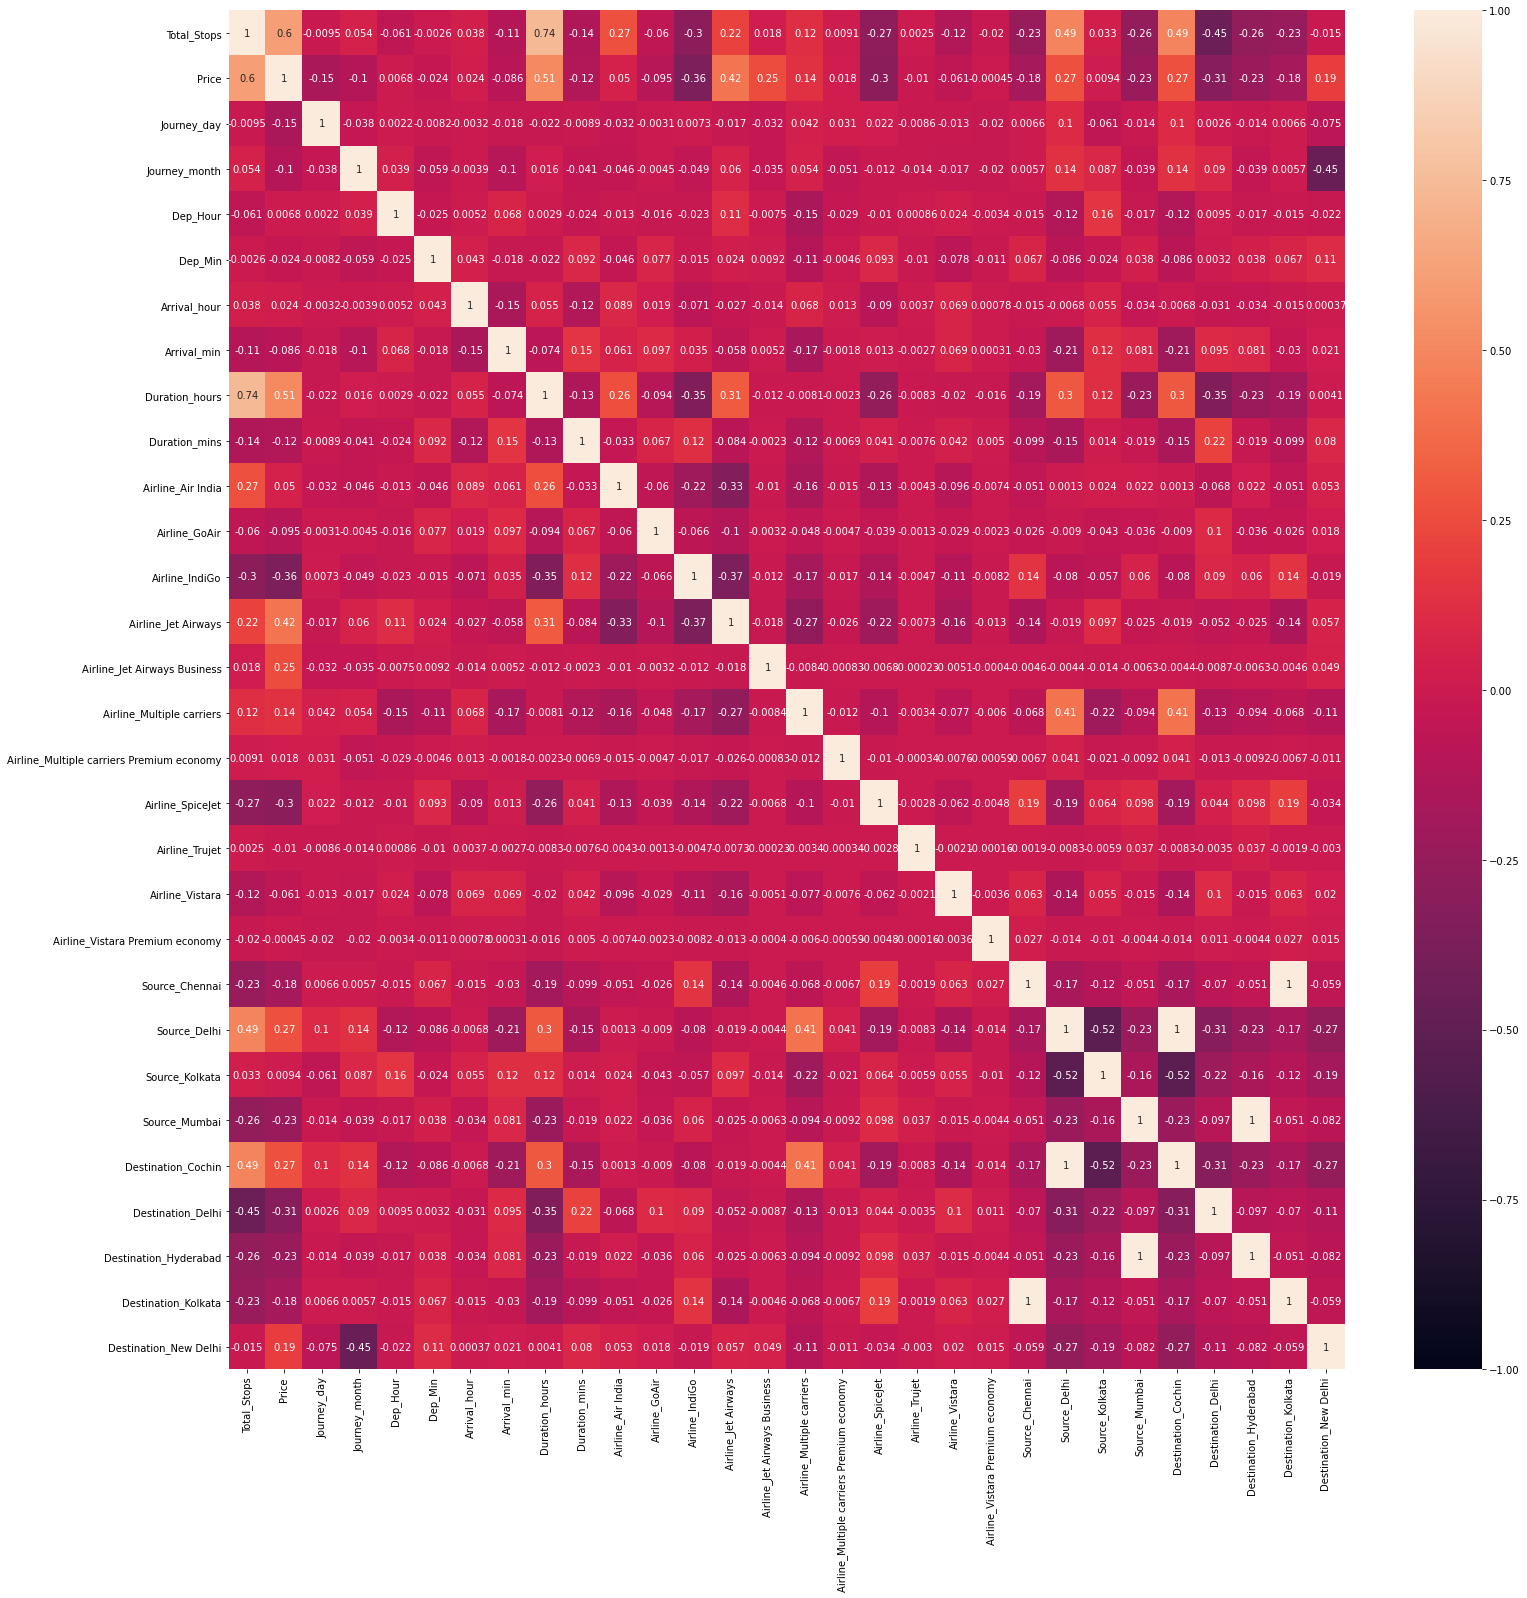

In [114]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [115]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

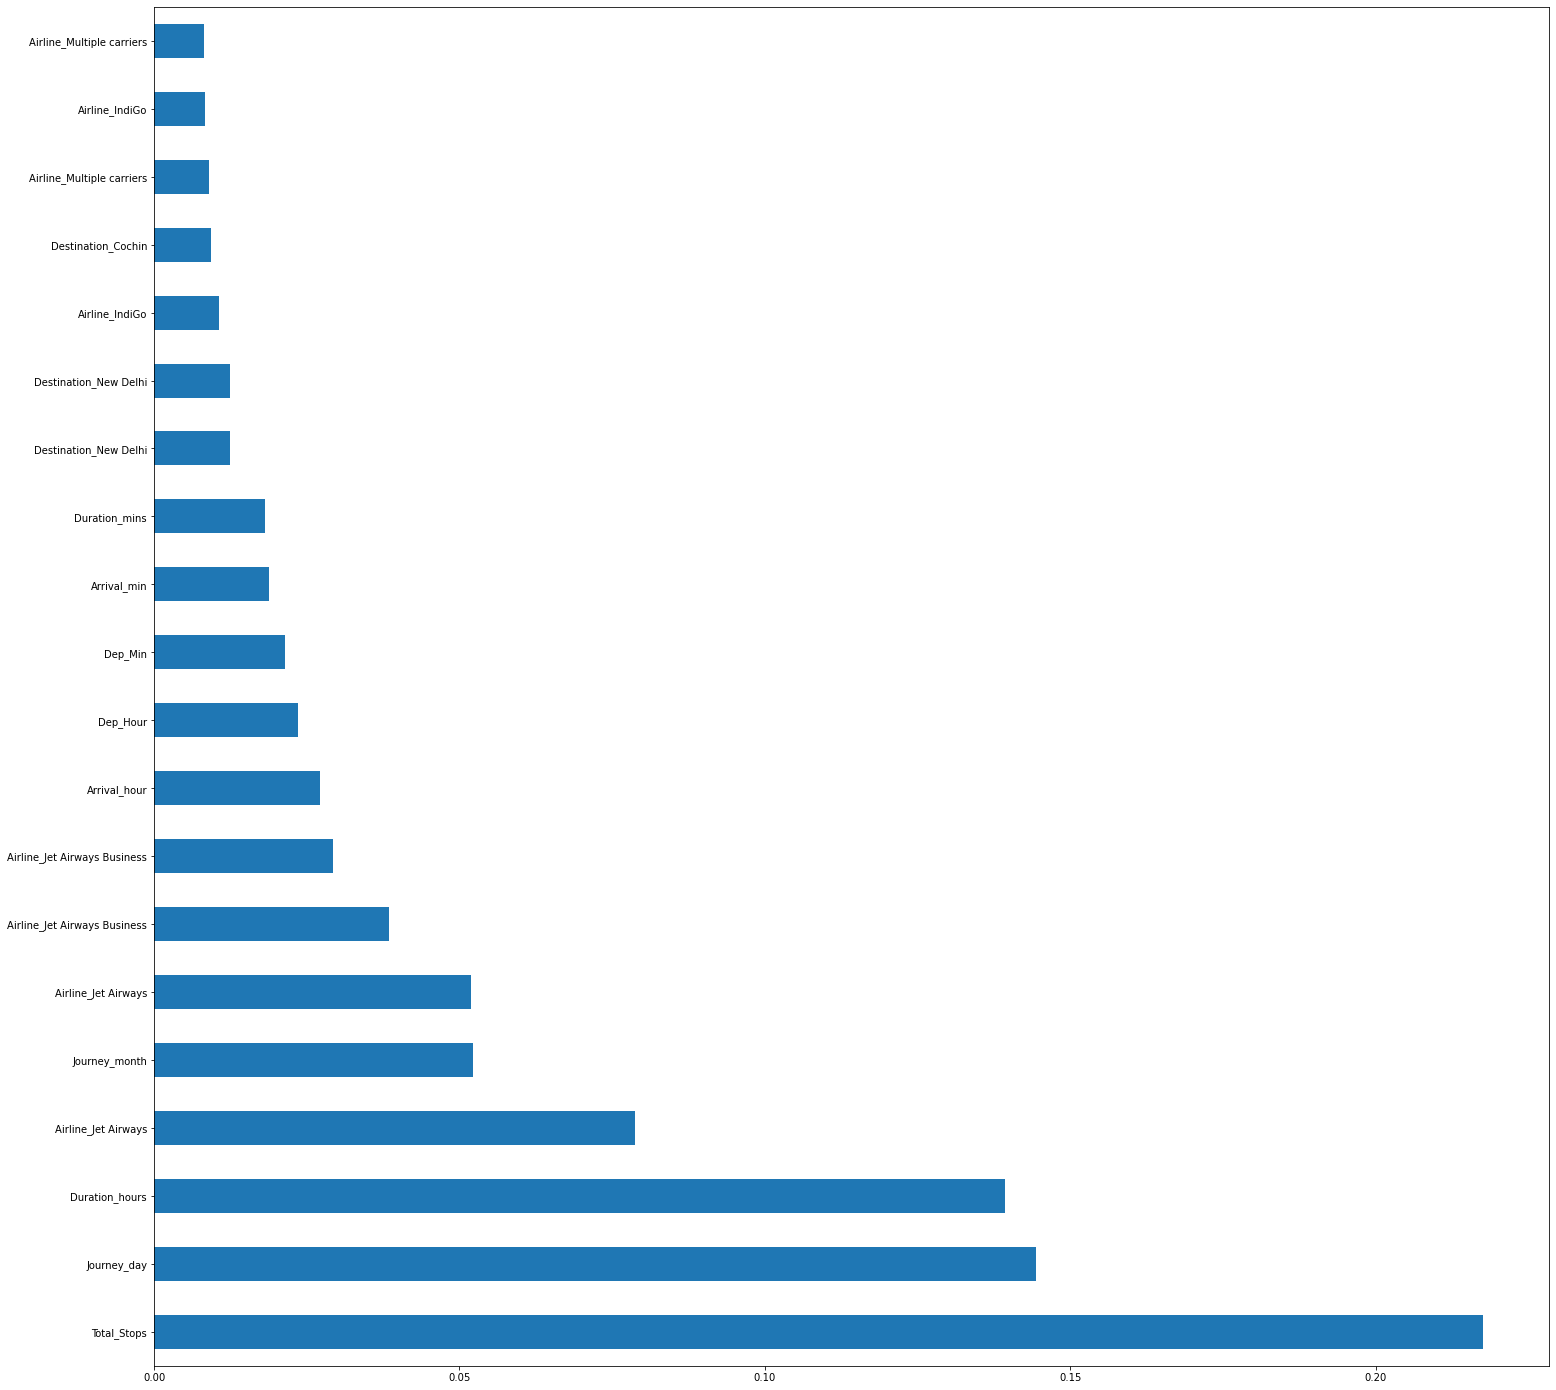

In [116]:
plt.figure(figsize=(25,25))
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [119]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=55)

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
lr=LinearRegression()

In [123]:
lr.fit(x_train,y_train)

LinearRegression()

In [124]:
lr_pred=lr.predict(x_test)

In [125]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [126]:
mean_absolute_error(y_test,lr_pred)

1992.1127452262272

In [127]:
mean_squared_error(y_test,lr_pred)

9042177.109972257

In [128]:
r2_score(y_test,lr_pred)

0.5885498318104683

In [129]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='neg_mean_absolute_error')
lr_score_n=-lin_score
np.mean(lr_score_n)

1964.9949512421142

In [130]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='neg_mean_squared_error')
lr_score_n=-lin_score
np.mean(lr_score_n)

8073125.354199836

In [131]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='r2')
lr_score_n=-lin_score
np.mean(lr_score_n)

-0.6199027318916419

In [132]:
from sklearn.tree import DecisionTreeRegressor

In [133]:
dt=DecisionTreeRegressor()

In [134]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [135]:
dt_pred=dt.predict(x_test)

In [136]:
mean_absolute_error(y_test,dt_pred)

1338.5736089443578

In [137]:
mean_squared_error(y_test,dt_pred)

6134000.385052262

In [138]:
r2_score(y_test,dt_pred)

0.7208818784006157

In [139]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='neg_mean_absolute_error')
dt_score_n=-lin_score
np.mean(dt_score_n)

1373.7495793439646

In [140]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='neg_mean_squared_error')
dt_score_n=-lin_score
np.mean(dt_score_n)

6164213.7995855985

In [141]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='r2')
dt_score_n=-lin_score
np.mean(dt_score_n)

-0.701499282476777

In [142]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
rf=RandomForestRegressor()

In [144]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [145]:
rf_pred=rf.predict(x_test)

In [146]:
mean_absolute_error(y_test,rf_pred)

1178.0626537825322

In [147]:
mean_squared_error(y_test,rf_pred)

4368381.659483893

In [148]:
r2_score(y_test,rf_pred)

0.801223605039934

In [149]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='neg_mean_absolute_error')
rf_score_n=-lin_score
np.mean(rf_score_n)

1175.2482782017714

In [150]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='neg_mean_squared_error')
rf_score_n=-lin_score
np.mean(rf_score_n)

3983864.958691192

In [151]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='r2')
rf_score_n=-lin_score
np.mean(rf_score_n)

-0.8131645828434848

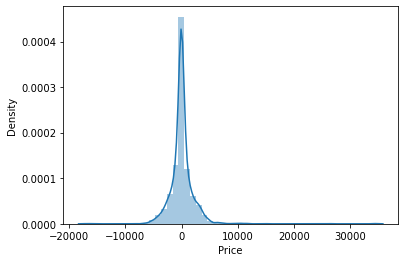

In [155]:
sns.distplot(y_test-rf_pred)
plt.show()

In [161]:
# using Hypertunning parameter
rf=RandomForestRegressor()

params={'n_estimators':[13,15],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]}
grd=GridSearchCV(rf,param_grid=params,cv=5,n_jobs=-1)
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [162]:
best_parameters=grd.best_params_
print(best_parameters)

{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [163]:
grd.best_score_

0.7792436076293324

In [ ]:
# from above conclusion it shows that random Forest is the best machine learning algorithm.